In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e85c81c2a774a33fb24d6eca7340871640376a22bb516391238506a6bddc3e6c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score, confusion_matrix



In [ ]:
# Veri setini yükleme işlemi
data_url = "https://raw.githubusercontent.com/TulinBabalikKopmaz/DryBean_Classification_ML/master/datasets/Dry_Bean_Dataset.xlsx"

# Veri setini gösterme işlemi
data = pd.read_excel(data_url)
print(data.shape)
data.head()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# **Data Bilgisi**



*   Data Set Adı: Dry Bean Dataset
*   Açıklama: 7 farklı kuru fasulye türüne ait 13.611 adet örneğin tanelerinin görüntüleri yüksek çözünürlüklü bir kamera ile çekilmiştir.
*   Toplamda 16 özellik; 12 boyut ve 4 şekil formu, bu örneklerden elde edilmiştir.
*   Veri Tipi: Çok Değişkenli (Multivariate)
*   Görev: Sınıflandırma (Classification)
*   Öznitelik Tipi: Kategorik, Tam Sayı, Gerçek Sayı (Categorical, Integer, Real)
*   Alan: Bilgisayar Bilimleri / Mühendislik
*   Format Tipi: Matris (Matrix)
*   Veri Setinde Eksik Değer: Eksik değer yok.
*   Kayıt Sayısı (Örnek Sayısı): 13,611
*   Öznitelik Sayısı: 17

> **Kaynak**
*   Murat KOKLU Faculty of Technology, Selcuk University, TURKEY. mkoklu@selcuk.edu.tr
*   Ilker Ali OZKAN Faculty of Technology, Selcuk University, TURKEY. ilkerozkan@selcuk.edu.tr

> **Genel Bilgiler**
Bu araştırmada, piyasa durumuna göre form, şekil, tip ve yapı gibi özellikler dikkate alınarak yedi farklı kuru fasulye türü kullanılmıştır. Benzer özelliklere sahip yedi farklı tescilli kuru fasulye çeşidini ayırt etmek amacıyla, uniform tohum sınıflandırması elde etmek için bir bilgisayarla görme sistemi geliştirilmiştir. Sınıflandırma modeli için, yüksek çözünürlüklü bir kamera ile 7 farklı tescilli kuru fasulyenin 13.611 tane tanesiyle görüntüler alınmıştır. Bilgisayarla görme sistemi tarafından elde edilen fasulye görüntüleri, segmentasyon ve özellik çıkarımı aşamalarına tabi tutulmuş ve toplamda 12 boyut ve 4 şekil formu olmak üzere 16 özellik elde edilmiştir.

> **Özniteliklerin Açıklamaları**

1.   Area (A): Alan Bir fasulye bölgesinin alanı ve sınırları içindeki piksel sayısı.
2.   Perimeter (P): Çevre Fasulyenin çevresi, sınırının uzunluğu olarak tanımlanır.
3.   Major axis length (L): Büyük eksen uzunluğu (L): Bir fasulyeden çizilebilecek en uzun çizginin uçları arasındaki mesafe.
4.   Minor axis length (l): Küçük eksen uzunluğu (l): Ana eksene dik dururken fasulyeden çizilebilecek en uzun çizgi.
5.   Aspect ratio (K): En-boy oranı (K): L ve l arasındaki ilişkiyi tanımlar.
6.   Eccentricity (Ec): Eksantriklik (Ec): Aynı momentlere sahip elipsin eksantrikliği.
7.   Convex area (C): Konveks alan (C): Fasulye tohumunun alanını içerebilecek en küçük konveks çokgen içindeki piksel sayısı.
8.   Equivalent diameter (Ed): Eşdeğer çap (Ed): Alanı bir fasulye tohumu alanı ile aynı olan bir çemberin çapı.
9.   Extent (Ex): Kapsam (Ex): Sınır kutusundaki piksellerin fasulye alanına oranı.
10.  Solidity (S): Yoğunluk (S): Konvekslik olarak da bilinir. Konveks kabukta bulunan piksellerin fasulyelerde bulunanlara oranı.
11.  Roundness (R): Roundness (R): Yuvarlaklık (R): Aşağıdaki formülle hesaplanır: (4πA) / (P²).
12.  Compactness (CO): Kompaktlık (CO): Bir nesnenin yuvarlaklığını ölçer: Ed / L.
13.  ShapeFactor1 (SF1) Şekil Faktörü 1 (SF1)
14.  ShapeFactor2 Şekil Faktörü 2 (SF2)
15.  ShapeFactor3 Şekil Faktörü 3 (SF3)
16.  ShapeFactor4 Şekil Faktörü 4 (SF4)
17.  Class Sınıf: (Şeker, Barbunya, Bombay, Çalı, Dermosan, Horoz ve Sıra)

*  Relevant Papers: KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507

*  Citation Requests / Acknowledgements: KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507



# **Keşifsel Veri Analizi**

In [ ]:
feature_array = data.columns[:-1]  # Class hariç tüm sütunlar

## Temel İstatistikler


> Ortalama ve Standart Sapmaları:
Sütunlara baktığımızda geniş bir standart sapma olduğu gözleniyor. Dolayısıyla özellikler farklı noktalar arasında oldukça değişkendir.
*   Area, Perimeter, ve MajorAxisLength öznitelikler standart sapmaları, ortalamalarına kıyasla yüksektir

> Minimum ve Maksimum Değerler:
*   Veriler homojen bir dağılım göstermediği için normalizasyon yapmanın yararlı olucağı düşünülmüştür.

> Veri Dağılımı:

*   Bakıldığında bir çok stunda ortalama ile medyan yakındır. Yani Veriler simetrik bir dağılım gösterir denebilir.
*   Perimeter ve MajorAxisLength özniteliklerinde uç değerler olabilir, çünkü maksimum değerler ortalamalardan oldukça uzakta.
*   Area, ConvexArea ve Perimeter öznitelikleri, diğer sütunlara kıyasla çok daha büyük değerler içeriyor. Dolayısıyla, normalizasyon kullanmak modelin daha doğru eğitilmesini ve sonuç vermesini sağlayabilir.
*   AspectRation ve Eccentricity öznitelikler üst sınır değerlerinde normalden sapmaları olabilir. Dolayısıyla kutu grafikleriyle bunları görselleştirip kontrol sağlamak gerekebilir.







In [ ]:
# Temel istatistiksel özet
data.describe()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Sınıf Dağılımları

Sınıflardan alınan örneklere bakıldığında, **BOMBAY** sınıfına ait örneklerin çok az olduğu gözlemlenmiştir. Dolayısıyla verisetimizi test ve train olarak ayırırken buna dikkat edilmelidir. Dengeli bir ayırım yapılması modelin doğru öğrenmesi açısından önemlidir.

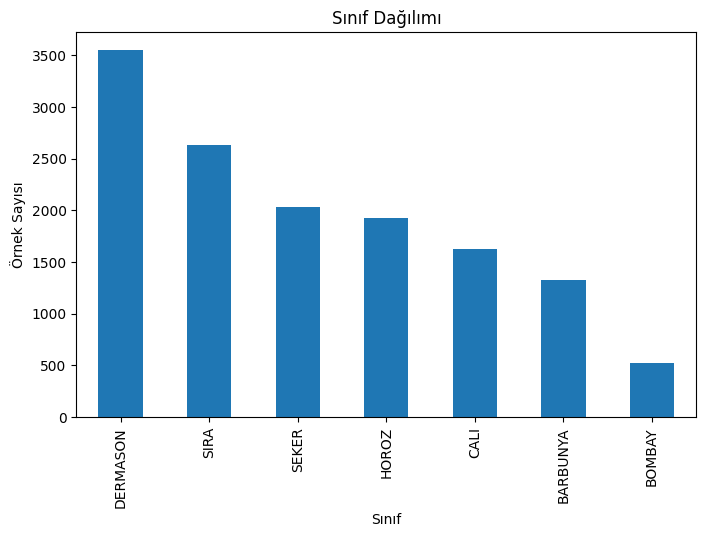

In [ ]:
# Sınıf dağılımını görselleştirme
class_counts = data['Class'].value_counts()
class_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Örnek Sayısı')
plt.show()

## Yinelenen ve Eksik Veri Kontrolü

Dataset 68 tane duplicate veriye sahiptir. Yani tamamı aynı özelliklerde 68 satır olduğu görülmüştür.
Dataset de eksik değer yoktur.

In [ ]:
# Eksik veri analizi
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Yinelenen kayıt analizi
duplicate_count = data.duplicated().sum()

# Özet bilgileri göster
print(f"Toplam Eksik Değer Sayısı: {missing_values.sum()}")
print(f"Toplam Yinelenen Kayıt Sayısı: {duplicate_count}")


Toplam Eksik Değer Sayısı: 0
Toplam Yinelenen Kayıt Sayısı: 68


## Histogram Grafikleri

Veri Dağılımlarını görsel olarak görmemize yardımcı olur.
* Genel olarak baktığımızda grafiklerin çoğu sağa yatık olarak görülmüştür. Homojen bir dağılım yoktur bu yüzden normalizasyon kullanılmıştır.

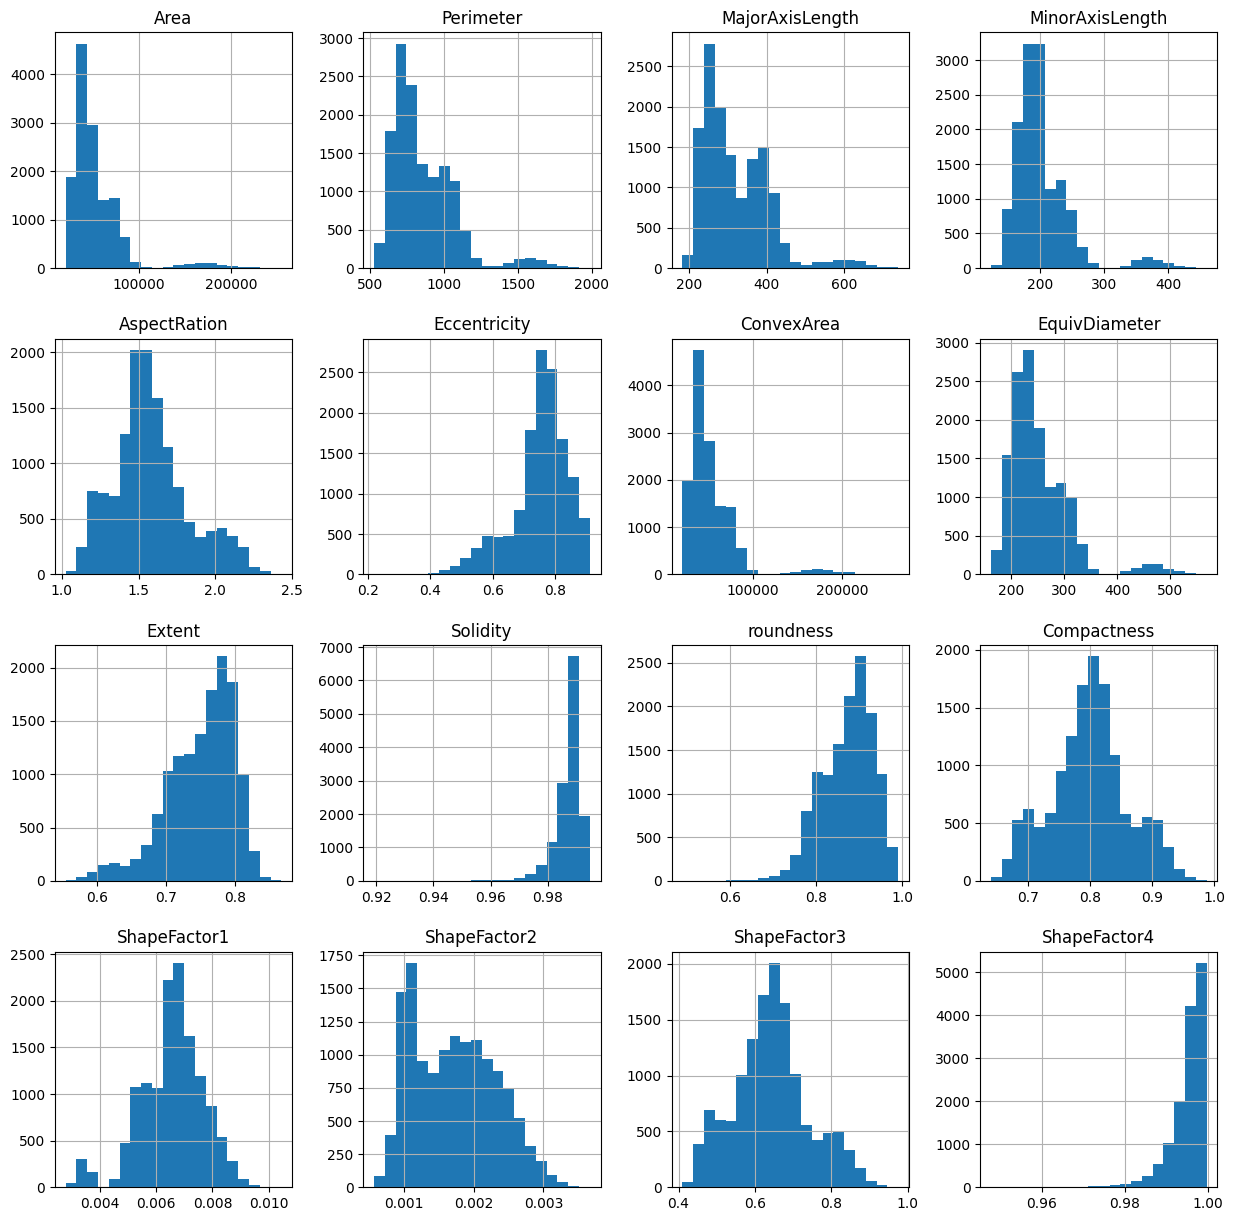

In [ ]:
# Sayısal sütunların histogramlarını çiz
data.hist(bins=20, figsize=(15, 15))
plt.show()


## Box Plot Analizi

Bu grafikler **outliers (uç Değerler)** gözlemlemek ve verinin genel dağılımını anlamada kullanılmıştır. Ayrıca veririnin homojenmi yoksa çok genişbir aralıktamı dağılım gösterdiğini gözlemlememizi sağlar.

Genel olarak baktığımızda **BOMBAY** sınıfına ait örneklerin çok az oldu ve modelin sınıflandırma sırasında zorlanacağı düşünülmüştür. Ancak Boxplot grafikleri incelendiğinde (Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea) diğer sınıflardan ayrıldığı gözlemlenmiştir. Buda bu sınıfın diğerlerinden farklı özelliklere sahip bir sınıf olduğunu göstermektedir.  

In [ ]:
# Boxplot Çizimi
def plot_boxplot(data, feature, class_name):
    """
    Amaç: Belirli bir özelliğin (feature) sınıflara (Class) göre dağılımını kutu grafiğiyle görselleştirmek.
    data: Analiz yapılacak pandas.DataFrame.
    feature: Kutusu çizilecek sayısal sütun adı.
    class_name: İlgili sınıf adı (şimdilik başlıklar kullanılıyor ama duruma göre düzenlenebilir).
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Class'], y=data[feature], data=data)
    plt.title(f"Boxplot: {feature} ile {class_name}", fontsize=14)
    plt.xlabel("Sınıf", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

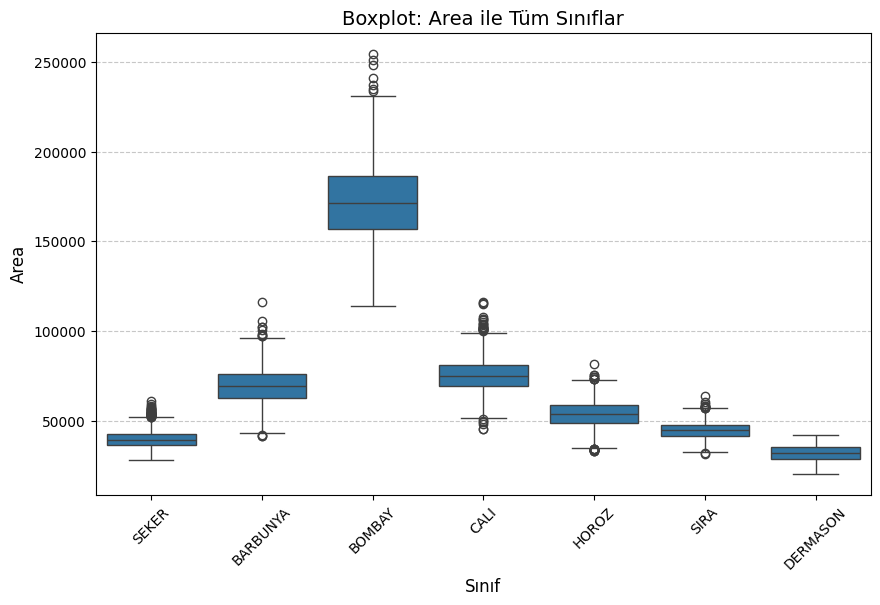

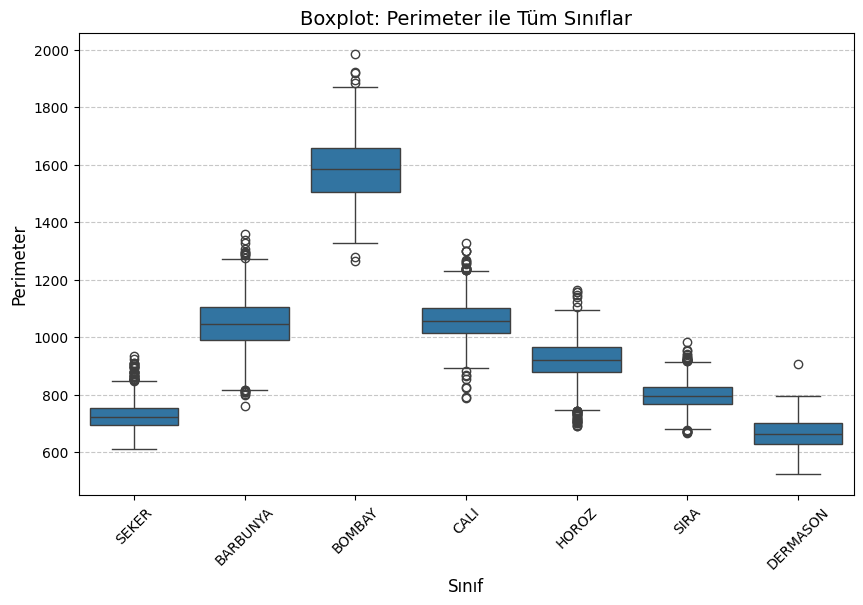

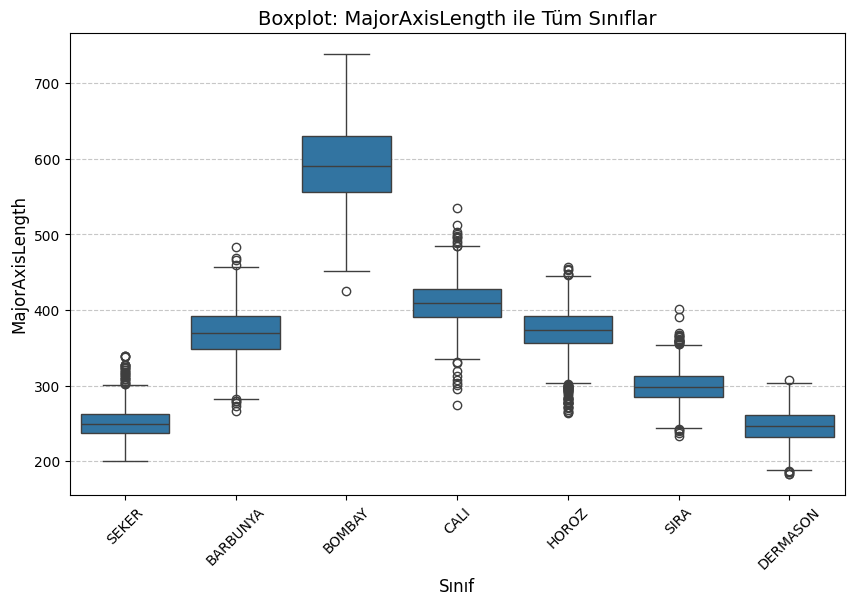

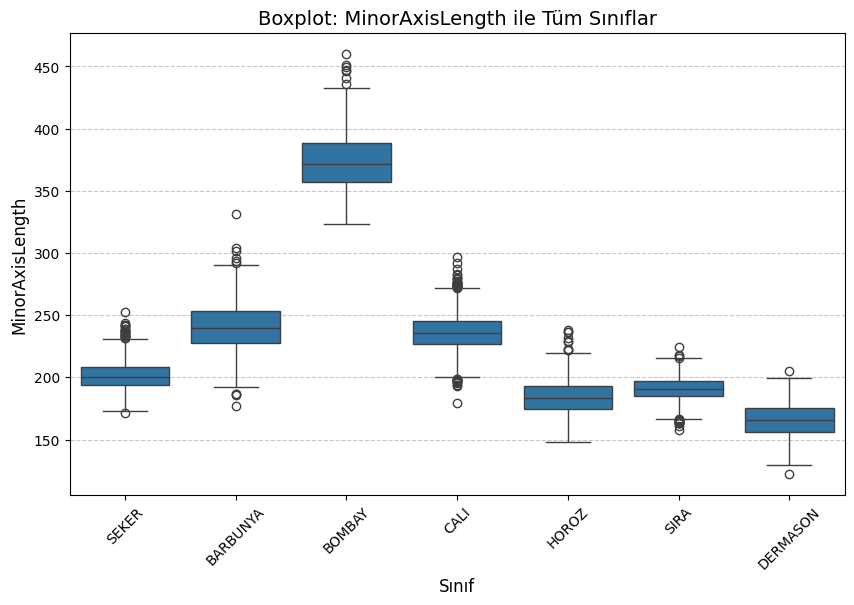

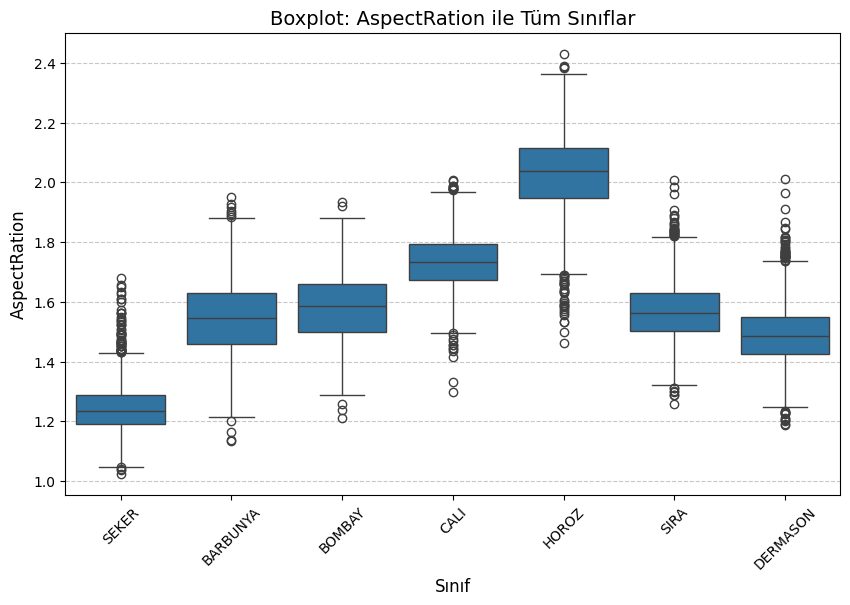

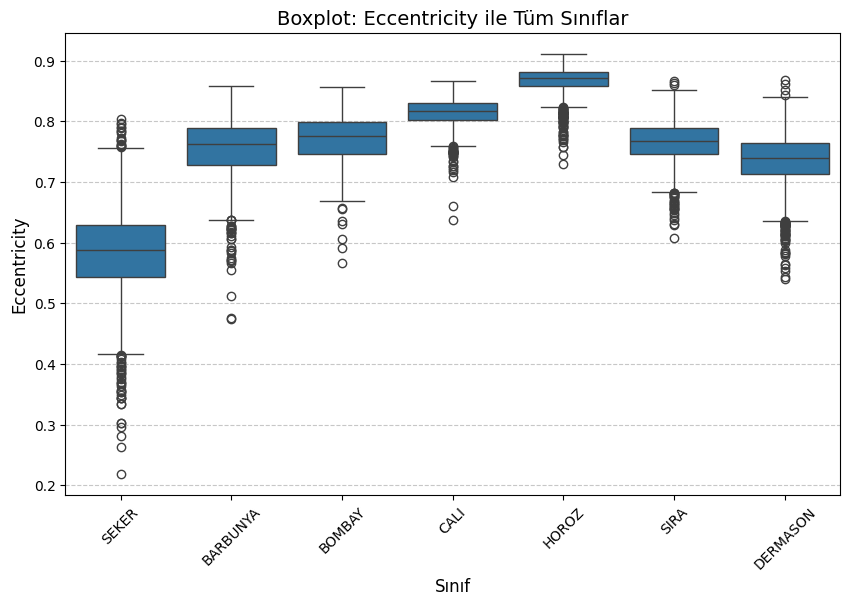

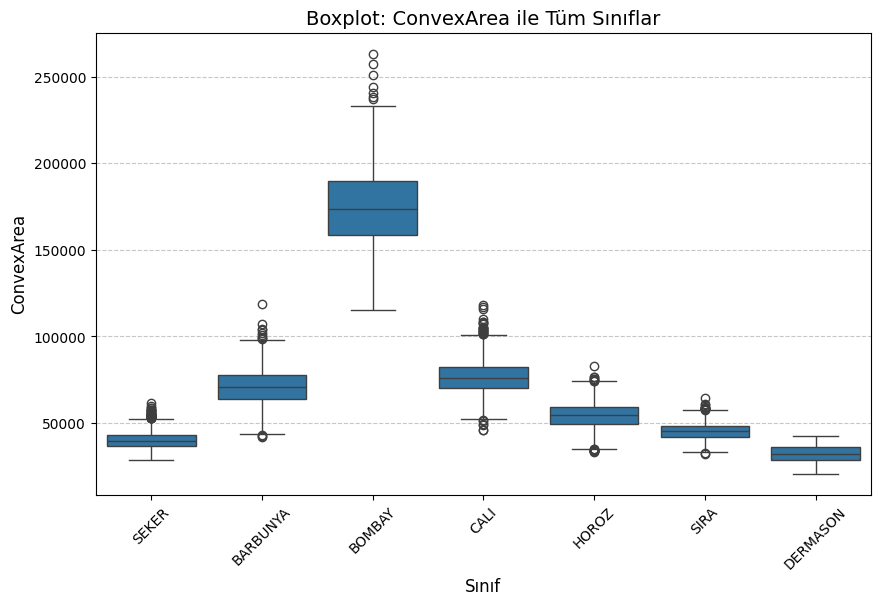

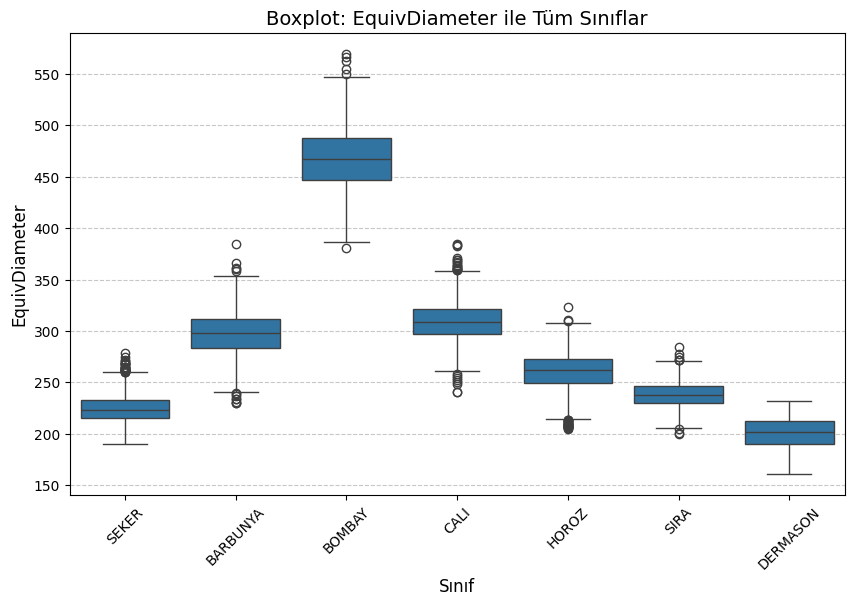

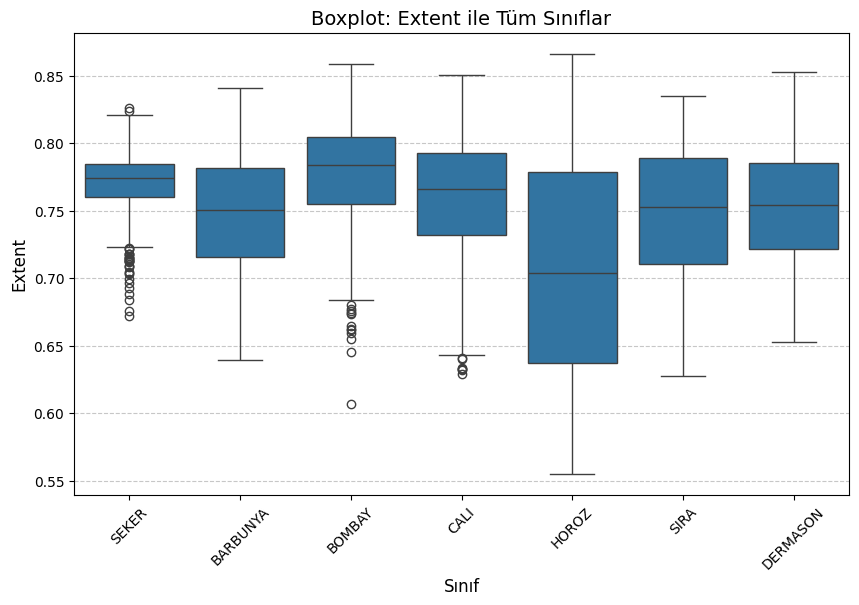

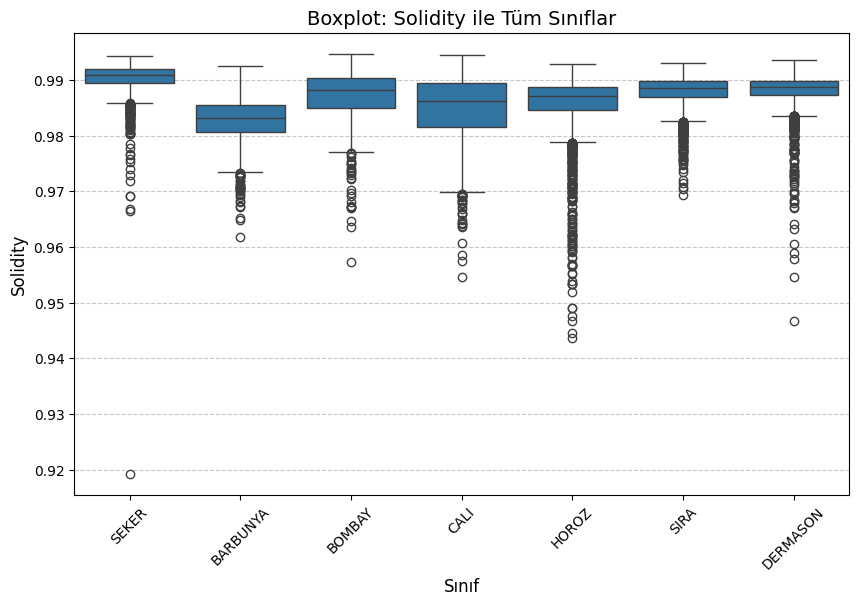

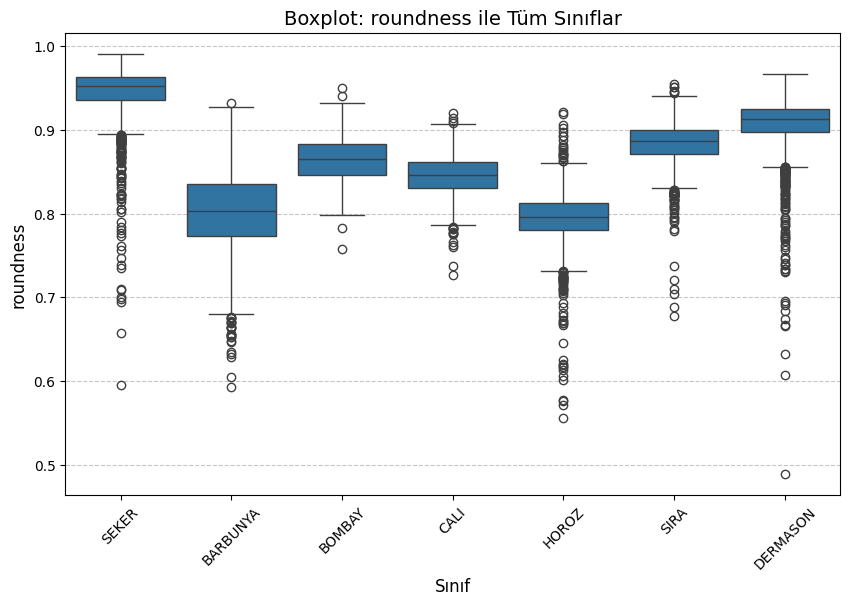

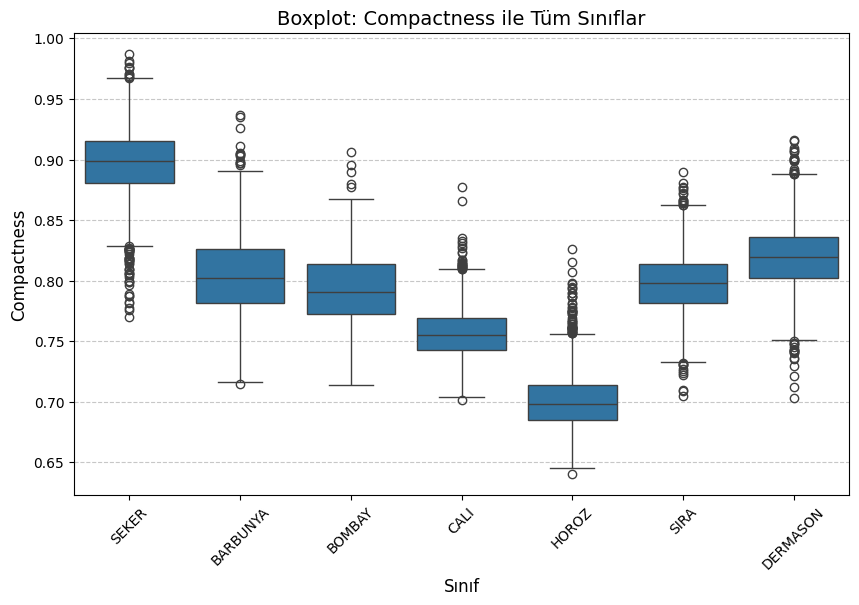

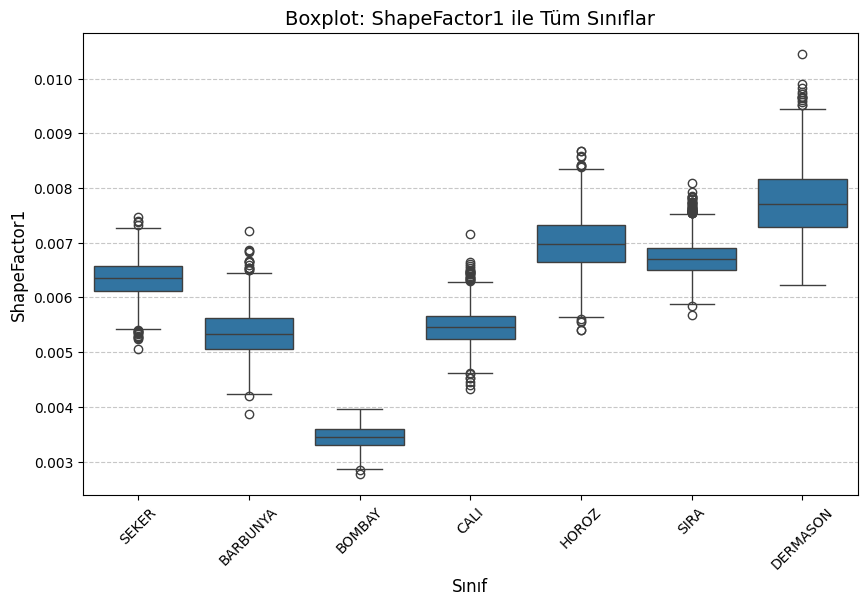

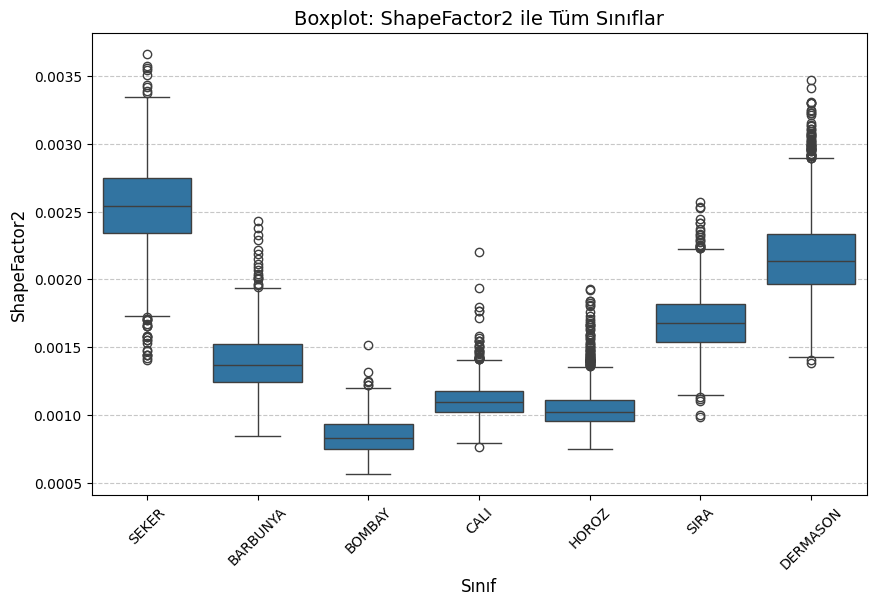

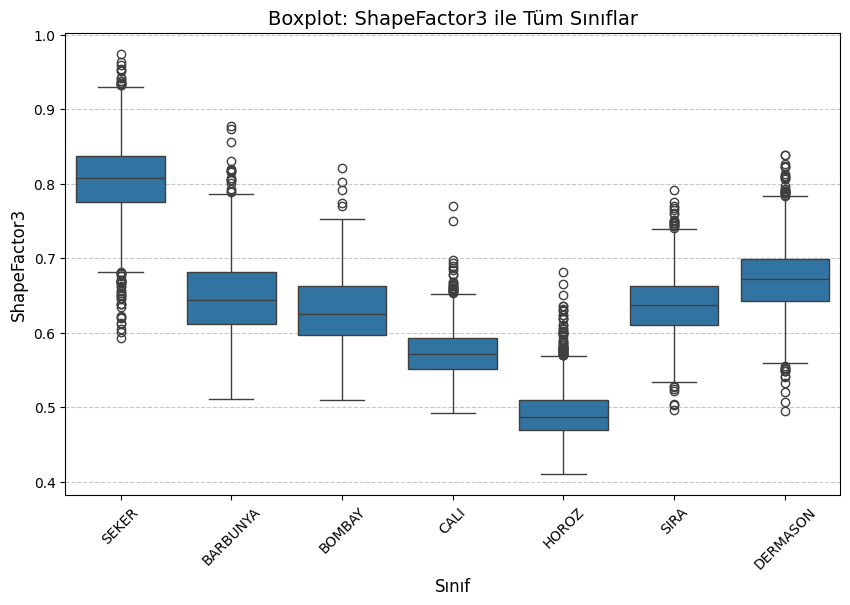

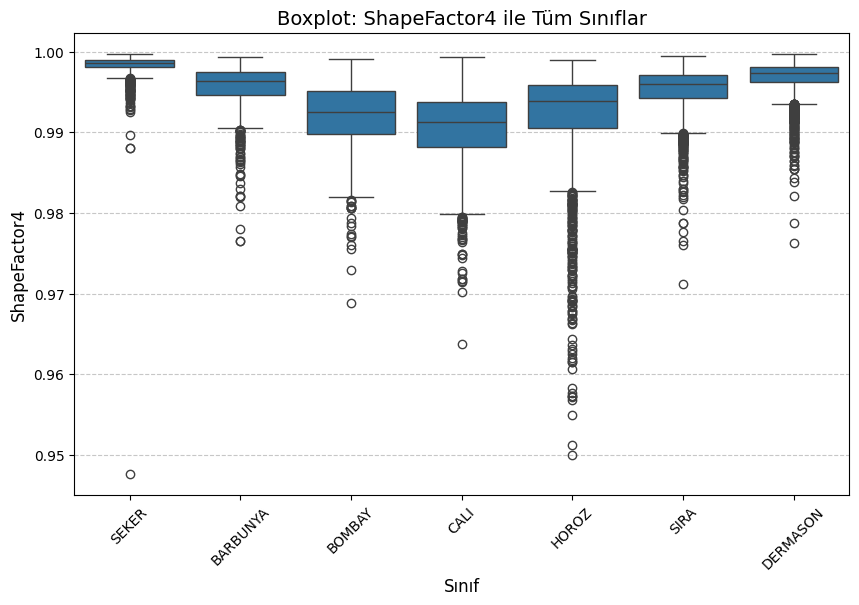

In [ ]:
for feature in feature_array:
    plot_boxplot(data, feature, "Tüm Sınıflar")

# Veri Ön İşleme

## Tekrarlı Verilerin Silinmesi

In [ ]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.shape

(13543, 17)

## One Hot Encoding
 String olan veriyi sayısallaştırmak için kullanılmıştır. Sınıflar sütunundaki veriyi sayılaştırarak korelasyon matrisine bakılmıştır. Bu sayede özniteliklerin birbirleriyle olan ilişkileri yorumlanmıştır.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoder oluştur
encoder = OneHotEncoder(sparse_output=False)  # Güncel parametre
encoded_classes = encoder.fit_transform(data[['Class']])

# Yeni sütun isimlerini al ve dataframe'e ekle
class_columns = encoder.get_feature_names_out(['Class'])
encoded_df = pd.concat([data, pd.DataFrame(encoded_classes, columns=class_columns)], axis=1)

# Sonuçları incele
encoded_df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,Class,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.834222,0.998724,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.909851,0.998430,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.825871,0.999066,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.861794,0.994199,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.941900,0.999166,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Korelasyon Matrisi

Bu kısmı burada yapmamızın nedeni korelasyon matrısı sadece sayısal veriler üzerinden oluşabilmektedir. Dolayısıyla One Hot Encoding yaptıktan sonra veriler arasındaki ilişkiyi gözlemleyebilmek adına yapılmıştır.

* Area ile Perimeter, Perimetter, MajorAxisLength, MinorAxisLength,ConvexArea, EquivDiameter arasında güçlü bir pozitif ilişki vardır.
* AspectRation ve Eccentricity arasında da yüksek pozitif ilişki vardır.
* Extent bakıldığında diğer özelliklerle düşük bir ilişkiye sahip olduğu görülmektedir. Diğerleriyle pekde ilgisi olmayan bir bilgi olma olasılığı yüksektir.

Yüksek korelasyon gösteren sütunlar arasında birini seçebilirsiniz. Böylece sütun azaltması yaparak modelimizin daha verimli çalışması sağlanabilir. Ayrıca bilgisayarımızıda yormaz.


> **Sınıflar**
* **BOMBAY** ile Area, Perimetter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter arasında güçlü pozitif bir ilişki vardır. Ayrıca ShapeFactor1 arasında negatif bir ilişki vardır.
* **DERMASON** ile ShapeFactor1,ShapeFactor2 arasında güçlü bir pozitif ilişki vardır. Ayrıca Area, Perimetter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter arasında negatif bir ilişki vardır.
* **HOROZ** ile AspectRation, Eccentricitiy arasında pozitif ilişki vardır. Ayrıca roundness, Compactness, ShapeFactory2, ShapeFactory3 arasında negatif bir ilişki vardır.
* **SEKER** ile roundness, Compactness, ShapeFactory2, ShapeFactory3 arasında pozitif ilişki vardır. Ayrıca AspectRation, Eccentricitiy arasında negatif bir ilişki vardır.
* **BARBUNYA** ile roundless arasında negatif bir ilişki vardır.
* **CALI** bakıldığında diğer özelliklerle neredeyse düşük bir ilişkisi olduğu görülmektedir.
* **SIRA** bakıldığında diğer özelliklerle çok düşük bir ilişki olduğu görülmektedir.

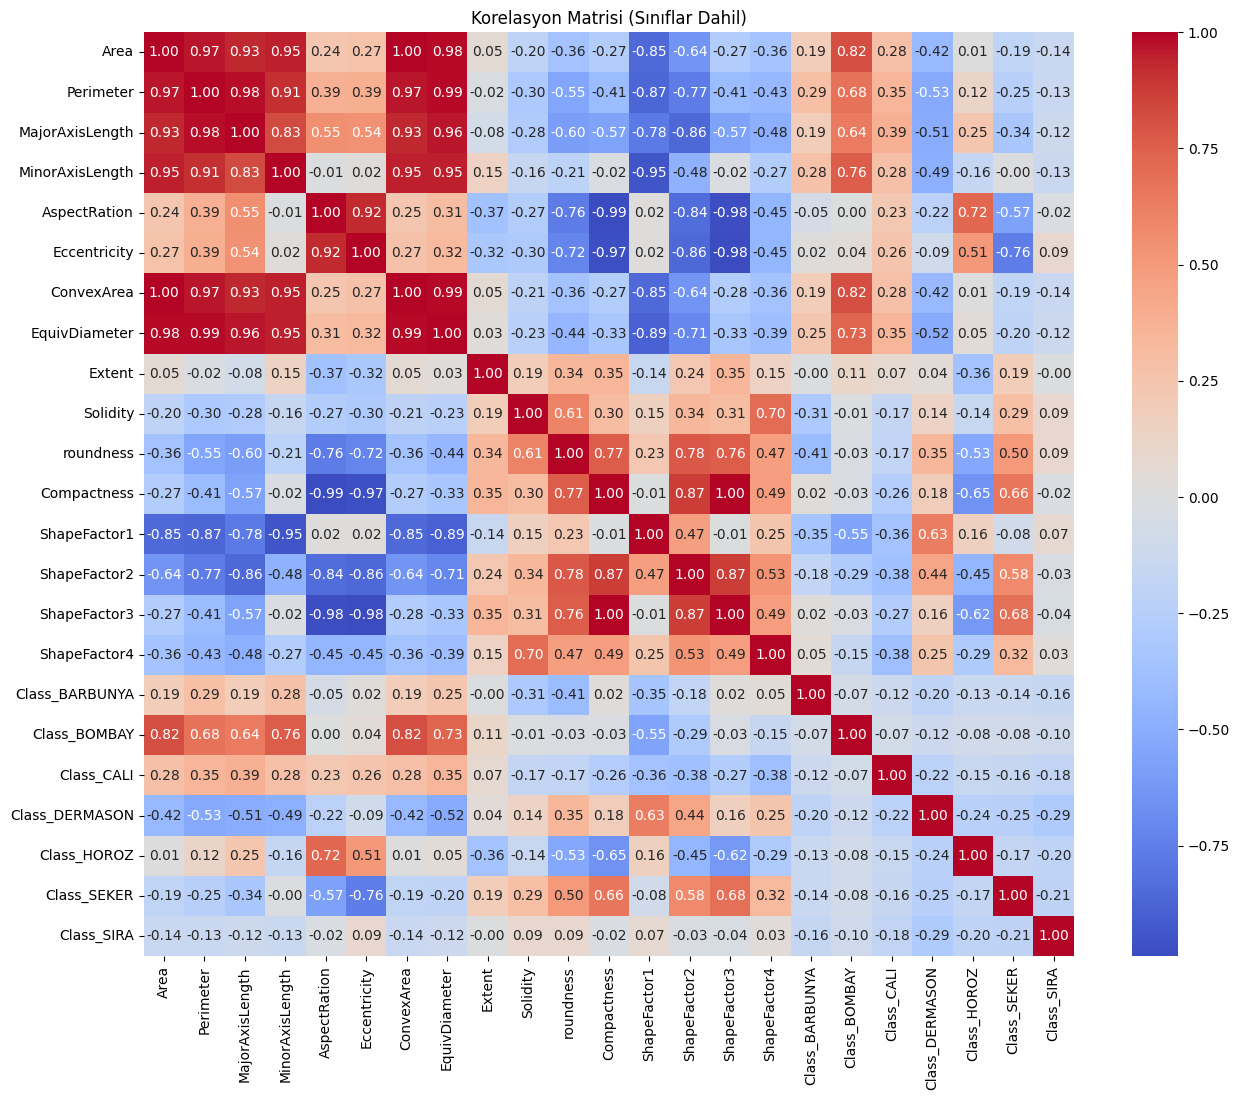

In [ ]:
# Korelasyon matrisi
numeric_data_with_encoded_classes = encoded_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 12))
correlation_matrix = numeric_data_with_encoded_classes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi (Sınıflar Dahil)')
plt.show()

In [ ]:
# One-Hot Encoding ile dönüştürülmüş sınıfları tek sütunlu sayısal hale getir
encoded_df['Class_Numeric'] = np.argmax(encoded_classes, axis=1)

# One-Hot Encoding sütunlarını kaldır
encoded_df = encoded_df.drop(columns=class_columns)

# Sonucu kontrol et
data_label = encoded_df
print(data_label[['Class', 'Class_Numeric']].head())


   Class  Class_Numeric
0  SEKER              5
1  SEKER              5
2  SEKER              5
3  SEKER              5
4  SEKER              5


In [ ]:
data_label.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Numeric
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5


# Veriyi Model İçin Hazırlama

Veri setimizi eğitim ve test olarak iki parçaya ayırmalıyız. Ancak Test verisine hiçbir şekilde müdehale edilmemelidir. Veri seti dengesiz dahi olsa gercek dünyayı yansıtmaktadır. Test verisine yapılan bir müdehale sonucunda modelin performansı iyi çıksa bile aslında bu durum yanlıştır. Çünkü gercek dünyada her zaman çok iyi ayrışmış veriler yoktur ve model böyle bir veride kullanılmak istenince performansı düşük çıkabilir.

Dolayısıyla Test verisi ayrılarak aslında hiç yokmuş gibi bütün işlemler Eğitim verisi üzerinden gerçekleştirilmiştir. Bu noktada hiperparametre optimizasyonu ve eğitim örneklerinin hem validation hemde eğitimde kullanılması için k-fold çapraz doğrulama kullanılmıştır.

## Eğitim ve Test Verisi Ayrımı

Bu bölümde X_test ve y_test datalarına müdehale edilmemesi için ayrılmıştır. Model eğitimi, hiperparametre optimizasyonu ve K-fold çapraz doğrulama için ise X_train ve y_train üzerinde gerçekleştirilmiştir.

* Verinin %80 Eğitim, %20 Test için ayrılmıştır.
* Hedef değişkenin sınıf oranları eğitim ve test datası için aynı kalması sağlanmıştır. (Örneğin eğitim datasında bir sınıftan gelen örnek oranı neyse test versinde de öyle olucaktır.)
* Kod yeniden çalıştırıldığında veri aynı şekilde bölünücektir. Dolayısıyla sonuçlar tekrar edilebilir olmayacaktır.

In [ ]:
# Özellikler (bağımsız değişkenler)
X = data_label.drop(columns=['Class','Class_Numeric'])  # Class sütunu hariç diğer sütunları X'e koyuyoruz

# Hedef değişken (bağımlı değişken)
y = data_label['Class_Numeric']  # Class sütununu y olarak tanımlıyoruz

In [ ]:
# Veriyi test ve eğitim olarak ayırma
'''
X (Bağımsız Değişkenler): Modelin tahmin yapacağı özelliklerdir. (giriş verileri)
y (Hedef Değişken): Modelin tahmin etmeye çalıştığı sınıflardır. (çıktı verileri)
X_train ve y_train: Eğitim kümesi
X_test ve y_test: Test kümesi
test_size=0.2 Test için %20 ayrılmıştır.
random_state=42 Rastgelelik kontrolü sağlar. Aynı kod her çalıştırıldığında, aynı şekilde bölünme yapılır. Bu, sonuçların tekrar edilebilir olması için önemlidir.
stratify=y Hedef değişkenin (y) sınıf oranlarının eğitim ve test kümelerinde aynı kalmasını sağlar.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Sonuçları kontrol et
print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")

Eğitim verisi boyutu: (10834, 16)
Test verisi boyutu: (2709, 16)


In [ ]:
data_label

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Numeric
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,3
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,3
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,3
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,3


## Veri Normalizasyonu

Keşifsel veri analizi kısmında data set detaylı olarak analiz edilerek verilerin homojen bir dağılım göstermediği gözlemlenmiştir. Dolayısıyla Z-Score normalizasyonu uygulanmıştır.

z= x−mean(x)/Varyans
​


In [ ]:
# StandardScaler ile Z-Score normalizasyonu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim verisi için öğren ve uygula
X_test_scaled = scaler.transform(X_test)       # Test verisine sadece uygula

# Sonuçları yazdır
print("\nScale edilmemiş:")
print(X_train.shape)
print(y_train.shape)

print("\nScale edilmiş:")
print(X_train_scaled.shape)
print(y_train.shape)

print("\n*****************")
print("Test Datası, Sadece Normalizasyon uygulanmıştır")
print(X_test_scaled.shape)
print(y_test.shape)


Scale edilmemiş:
(10834, 16)
(10834,)

Scale edilmiş:
(10834, 16)
(10834,)

*****************
Test Datası, Sadece Normalizasyon uygulanmıştır
(2709, 16)
(2709,)


## LDA

Veri setimiz çok boyutlu bir uzayda olmasına rağmen onu iki boyutlu bir uzaya indirgeyerek dağılımını gözlemlemiş olduk. Görüldüğü üzere BOMBAY sınıfı diğerlerine göre daha ayrışmış gözüküyor.

LDA seçme nedenimiz, veriseti kategorik olarak ayrılıyor olmasıdır.

LDA işleminden sonra bir class'ın diğerlerinden oldukça ayrı olduğunu görebilmekteyiz. Diğer 2 bileşen kulalnarak diğer class'ların hala iç içe girmiş olduğu gözükmektedir. Bu modelimizi biraz olumsuz etkileyebilir dolayısı ile açıklanabilirlik dikkate alınarak birden fazla bileşen seçilerek datanın modeli açıklanabilirliği artırılmaya çalışılacaktır.

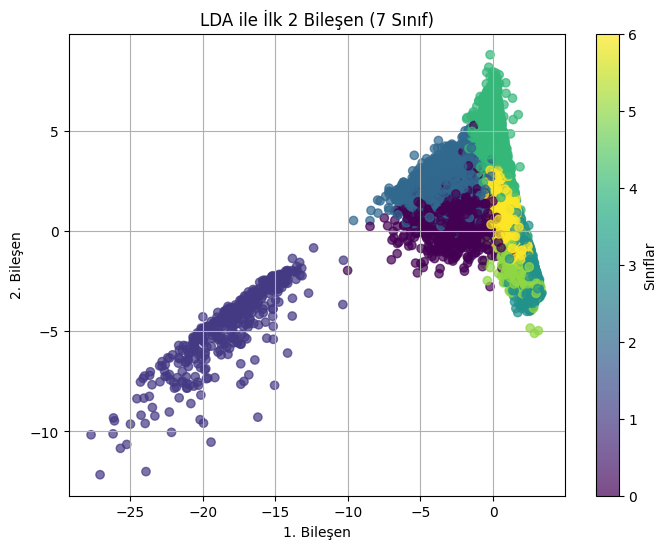

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA için veri hazırlığı
lda = LDA(n_components=6)  # 7 sınıf için en fazla 6 bileşen seçilebilir
X_lda = lda.fit_transform(X_train_scaled, y_train)

# İlk iki bileşeni görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title("LDA ile İlk 2 Bileşen (7 Sınıf)")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.colorbar(label='Sınıflar')
plt.grid(True)
plt.show()


# Model Seçimi

## MLP Classifier

> **Çok Katmanlı Yapay Sinir Ağları (Multilayer Perceptrons)**
Bir perceptron düzlemi bir aktivasyon fonsiyonundan geçirerek bir çıkış elde etmemizi sağlar. Ancak Geoffrey Hinton'un geriye yayılım algoritması sayesinde veriyi en uygun şekilde ayıracak düzlemlerin katsayılarını buluruz.
* MLP temelde gradient inişi (GD) algoritması sayesinde en optimal ağırlıkları bulmaya çalışır. Dolayısıyla eğitim GD ile yapılır.
* Geriye yayılım algoritması hatanın, ağ boyunca geri yayılmasını ve ağırlıkların hatalara göre kendini güncellemesini sağlar.
* Sınıflandırma problemlerinde Gradient sönümlenmesi olmasın diye Cross Entropy Loss fonksiyonu kullanılabilir.

> **MLP özellikleri**
* Gizli Katmanlar (Hidden Layers): Sinir ağında gizli katmanların sayısını ve her katmandaki nöron sayısını kendimiz verebiliriz. (örneğin, (100,), (50, 30)).
* Aktivasyon Fonksiyonu (Activation): Her bir perceptronun çıkış değeri, girdilerin bir aktivasyon fonsiyonundan geçirilmesiyle hesaplanır.
* Aktivasyon fonksiyonun seçimi deneme yanılma yoluyla belirlenmiştir.
* Bazı önemli aktivasyon fonksiyonları aşağıda açıklanmıştır.
* * relu (Rectified Linear Unit): Genellikle en iyi sonuçları verir.
* * logistic (sigmoid): Çıkış değerini 0 ile 1 arasında sınırlar.
* * tanh: Çıkış değerini -1 ile 1 arasında sınırlar.
* Geriye yayılım algoritması, hatanın ağ boyunca geri yayılması sayesinde ağırlıkları bu hatalara göre güncellediğini söylemiştik.
* Geriye yayılımı opimize eden algoritmalar aşağıdadır.
* * adam: En yaygın ve genellikle en iyi sonuçları verir.
* * sgd: Stokastik gradyan inişi.
* * lbfgs: Küçük veri setleri için etkilidir.

> **Hiperparametreler**
* hidden_layer_sizes: Gizli katman sayısı ve her katmandaki nöron sayısını belirlememize yarar. Aslında her katmandaki nöron sayısı girdi verilerini kendi uzayından alır ve n boyutlu bir uzaya taşır. Dolayısıyla kendi uzayında ayrışamayan veri farklı boyutlarda ayrılabilir hale gelir.
* max_iter: Modelin maksimum iterasyon (eğitim döngüsü) sayısı.
* learning_rate: Öğrenme oranı ayarını kontrol eder. Burada aslında temelde GD algoritmasında verimizin çok boyutluluğundan kaynaklı loss fonksıyonumuzun yüzey yapısını bilemeyiz. Dolayısıyla kaybın en az olduğu nokta bu fonksiyonun yerel min noktalarıdır. Ancak fonksiyonun yapısını bilemediğimiz için vekil fonksiyonla bunu yapmaya çalışırız. Vekil fonksiyonumuz parabolik bir yapıya sahiptir ve öğrenme oranı bu fonksiyonun kollarının nekadar açık olacağını söyler. Kolların durumuda yerel min noktasının yavaş veya hızlı bulunmasını sağlar. (Çok büyük veya çok küçük verilmesi skıntı yaratır.)
* alpha: L2 regularization overfitting’i (ezberi) önler. Aslında bunu loss fonksiyonumuza, model ağırlıklarının hataları kadar bir ceza terimi ekleyerek gerçekleştirir.

> **Avantajları**
1. Esneklik: Gizli katmanlar ve nöron sayısını biz kendimiz belirleye bildiğimiz için farklı problemlerde bile istediğimiz gibi ayarlıya biliyoruz. Ayrıca bu sayede arakatmanlara müdehale edebiliyoruz.
2. Lineer Olmayan Problemleri Çözebilir: Verimize baktığımızda (LDA) çokda lineer ayrılabilir bir yapıda olmadığını görmüştük. Bu algoritma temelde karmaşık ve doğrusal olmayan ilişkileride öğrenebilir. (Aslında veriyi başka boyutlara taşıyarak oralarda liner ayrılıp ayrılmadığına bakıyor.)
3. Aktivasyon Fonksiyonu ve Optimizasyon Seçeneği: İstersek katmanlar arsındaki aktivasyon fonksiyonlarını biz belirleye biliyoruz. Çıktı katmanına farklı, arakatmanlara farklı aktivasyon fonksiyonları seçebiliyoruz. GD algoritmasını düşündüğümüzde bu önemli bir durumdur. Çünkü dolaylıda olsa aktivasyon fonksiyonun türevi gradyanların sönümlenmesine sebep olabilir.

> **Dezavantajları**
1. Büyük veri setlerinde eğitim çok uzun sürebilir. Katman ve nöron sayısı artıkça dahada karmaşıklaşır.
2. Hiperparametre sayısı çok fazladır ve en optimal cevabı bulan parametre kombinasyonunu ayarlamak zordur.
3. Küçük verilerde overfitting (modelin veriyi ezberlemesi) olayı yaşanabilir.

> **Overfitting olmaması için yapılacaklar**
* Veriyi arttırımı yapılabilir.
* Loss fonksiyonuna ceza terimi eklenebilir
* Alakasız öznitelikler verisetinden atılabilir.
* Erken durdurma yapılabilir.

* Macro Avg: Sınıfların eşit ağırlıklı ortalamasıdır.
* Weighted Avg: Sınıfların veri setindeki oranlarına göre ağırlıklandırılmış ortalamasıdır.
* Accuracy:Doğru tahminlerin hepsinin, toplam test verisi üzerindeki oranıdır. (Normalizasyon yapılmayan veriler üzerinde skıntı yaratabilir.)

> **Sonuçların Yorumlanması**
>> Modelin Genel Performansı
* Acc: %92.76 genel olarak iyibir performansı var diyebiliriz.
* Macro Average: 0.94 Burada herbir sınıfın metriklerinin (Precision, Recall ve F1-Score) ortalaması alınarak bir sonuç elde edilmiştir. Sınıflar dengesiz olsa bile her sınıfa eşit önem verilerek hesaplanmıştır. Model tüm sınıflarda genel olarak iyi performans göstermiştir.
* Weighted Average: 0.93 Burada sınıflar arası bir dengesizlik olduğu durumu hesaba katarak ortalama alınarak bir sonuç elde edilmiştir. Modelin dengesizliğe rağmen iyibir sonuç çıkardığını söyleyebiliriz.

>> Sınıf Bazında Performans
* Sınıf 0: BARBUNYA
** Precision, Recall, F1-Score: 0.92
** Buradan barbunyaların % 92 sini doğru tahminettiği söylenebilir.Model sınıfı tanıyabiliyor.
* Sınıf 1: BOMBAY
** Precision, Recall, F1-Score: 1.00
** Bu sınıfta model harika bir performans sergilemiş en az veri olmasına rağmen. Bunun nedeni LDA' da görmüştük. Bu sınıf diğer sınıflara göre baya uzakta ve ayrılabilir bir durumda olduğu iç içe geçmemdiği gözlemlenmiştir. Model tüm örnekleri doğru tahmin etmiştir.
* Sınıf 2: CALI
** Precision: 0.93, Recall: 0.94, F1-Score: 0.93
** Precision ve Recall değerlerinin dengeli olması, modelin hem FP (hatalı pozitif) hem de FN (hatalı negatif) oranlarını düşük tuttuğunu gösteriyor. Model başarılı bir sonuca ulaşmıştır.
* Sınıf 3: DERMASON
** Precision: 0.92, Recall: 0.93, F1-Score: 0.93
** Calı sınıfına benzer bir durum söz konusudur.
* Sınıf 4: HOROZ
** Precision: 0.97, Recall: 0.94, F1-Score: 0.96
** Model biraz daha yüksek bir precision değeri yakalamış. (FP) Yanlış pozitif oranı oldukça düşük.
* Sınıf 5: SEKER
** Precision: 0.95, Recall: 0.96, F1-Score: 0.95
** Calı sınıfına benzer bir durum sözkonusudur.
* Sınıf 6: SIRA
** Precision: 0.88, Recall: 0.87, F1-Score: 0.88
** Model burada diğerlerine kıyasla biraz daha düşük bir performans sergilemiştir. Ama kabuledilebilir diyebiliriz.

> **Modelin Güçlü Yönleri**
Genel olarak model yüksek bir doğrulukla çalışıyor diyebiliriz. Baktığımızda HOROZ ve BOMBAY sınıfında mükemmel sonuçlar elde etmiştir.

> **Modelin Zayıf Yönleri**
Model SIRA sınıfını diğer sınıflara göre daha az tanımıştır. Örnek sayısına baktığımızda aslında düşük olmadığını görüyoruz.





Model Doğruluk Skoru: 0.9276

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.94      0.93       326
           3       0.92      0.93      0.93       709
           4       0.97      0.94      0.96       372
           5       0.95      0.96      0.95       406
           6       0.88      0.87      0.88       527

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



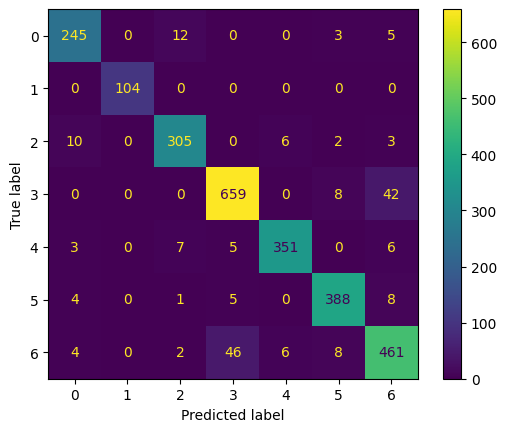

In [ ]:
# MLPClassifier modelini oluştur
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Modeli eğitim verileri ile eğit
mlp.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahmin yap
y_pred = mlp.predict(X_test_scaled)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.show()


### MLP İçin 2 Fold Çapraz Doğrulama

**K-Fold Çaplamaraz Doğru**
Gerçek dünya problemlerinin çzümüne yaklaşabilmek adına bunu yapıyoruz. Sanki ilimizde hiç test verisi yokmuş gibi modelimizin eğitim datasını k değeri kadar parçaya bölüyoruz. Her bir adımda böldüğümüz parçalardan biri artık bizim test verimiz oluyor ve geri kalanlar ise train olarak kullanılıyor. Bu şekilde eğitimde kullanılan örneklerin modelin hem test hemde eğitim aşamasında yer alması sağlanıyor. (Baştaki test verisine dokunulmadan.)

**Veri setinizi K eşit parçaya böler.**

1. K-1 parçayı eğitim, kalan 1 parçayı doğrulama (validation) için kullanır.
2. Bu işlemi her parça doğrulama seti olarak kullanılacak şekilde tekrar eder (K iterasyon).
3. Sonuç olarak, tüm veriler bir kez test vebir kez doğrulama seti olarak kullanılır.




In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score

# K-Fold ayarları
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # 2 parçalı K-Fold

'''
StratifiedKFold: Sınıfların dağılımını her fold (parça) içinde koruyan çapraz doğrulama yöntemidir.
n_splits=2: Veriyi 2 parçaya böler. Yani 2 iterasyon yapılır. Her iterasyonda bir parça doğrulama (validation) için, diğer parça eğitim (training) için kullanılır.
shuffle=True: Veriyi karıştırır. Bu, sınıfların dağılımını daha dengeli hale getirir.
random_state=42: Rastgeleliği kontrol eder, sonuçları tekrar edilebilir hale getirir.
'''

# MLPClassifier modeli
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Weighted F1-Score için
scoring = make_scorer(f1_score, average='weighted')
'''
make_scorer: F1-score'u metriğini kullanmak için fonksiyondur.
f1_score: Precision (doğruluk) ve recall (geri çağırma) metriklerinin harmonik ortalamasını ölçer.
average='weighted':Sınıf dengesizliklerini hesaba katar.Sınıflar arasında örnek sayısına göre ağırlıklandırılmış bir ortalama alır.
'''
scores = cross_val_score(mlp, X_train_scaled, y_train, cv=kfold, scoring=scoring)
'''
cross_val_score: Modeli K-Fold göre değerlendirmeyi sağlayan fonksiyon.
cv=kfold parametresi ile K-Fold ayarlarını kullanır.Her fold için F1-score metriğini hesaplar.
mlp: MLPClassifier modeli.
X_train_scaled: Normalizasyon uygulanmış eğitim özellikleri.
y_train: Eğitim verisinin sınıfları (etiketler).
cv=kfold: 2 parçalı stratified K-Fold çapraz doğrulama.
scoring=scoring: Weighted F1-score metriği kullanılır.
'''

# Skorları ve ortalamayı yazdır
print("Her bir Fold'un F1 skorları:", scores)
print("K-Fold Ortalama F1 Skoru:", scores.mean())


Her bir Fold'un F1 skorları: [0.93140764 0.93090657]
K-Fold Ortalama F1 Skoru: 0.9311571077473356


## XGBoost

### Kullandığımız hiperparametreler


* n_estimators : modeldeki ağaç sayısıdır.


* learning_rate : inişteki adım büyüklüğümüz.


* max_depth: ağaçların maximum derinliğidir.


* subsample : overfittingi engellemek için verilerin ne kadarının ağaç tarafından kullanılmayacağıdır.


* colsample_bytree : subsample gibi fakat featureları verilerin oranda random kullanıp kullanmayacağını belirliyor.


* gamma : ağacın bir yaprağının daha fazla bölünüp bölünmeyeceğine kadar veren minimum loss reduction değeridir.


### Normalizasyon ve Hiperparametre Optimizasyonu
* XGBoost bir decision tree modeli olduğu için değerleri normalize etmemize gerek yok.
* Modelin hiperparametre optimizasyonu için bir parametre grid'i oluşturup grid_search methodu ile en uygun parametreleri bulmasını sağlıyoruz.


In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=2,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 2187 candidates, totalling 4374 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1_weighted', verbose=1)

* grid_search methodu bize en uygun hiperparametreleri bizim verdiğimiz param_grid içerisindeki en uygun kombinasyonu bularak veriyor.
* Eğitimin rastgele denk gelen  train ve test veri setine bağlılığını azaltmak için de K-Fold Cross Val kullanıp k değerini grid_search 'ün cv değerine 5 olarak veriyoruz.

In [ ]:

best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_




best_paramd_model = model = XGBClassifier(best_params
)
best_paramd_model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

* En uygun parametreler elde edildikten sonra tüm train setimizle bu parametreleri kullanarak bir model eğitip test ediyoruz.

In [ ]:
from sklearn.metrics import f1_score

final_fscore = f1_score(y_test,y_pred_test,average='weighted' )


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


print(classification_report(y_test, y_pred_test))

